In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Finding the best number of clusters for K-means cluster

In [2]:

# Compute the linkage matrix
# method='ward' minimizes the variance of the clusters being merged
X = pd.read_csv('data/df_kmeans.csv')
X = X.select_dtypes(include=[np.number]).groupby('KMeans_Cluster').mean().values
Z = linkage(X, method='ward')



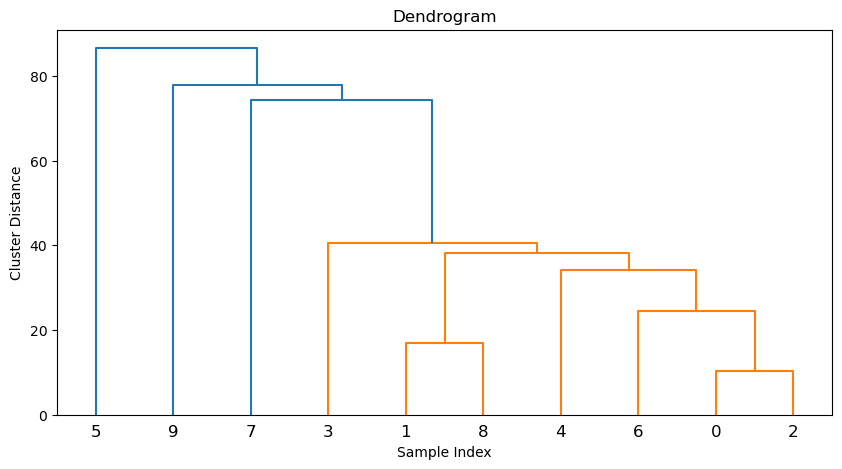

In [3]:
# create dendrogram
# Plot Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")
plt.show()

Using the vertical line method, the best number of clusters is 3

# Plot dendogram from Agglomerative Clustering

In [5]:
from src.hierClusterKmeans import *
print(labels)

[0 0 0 0 0 1 0 0 0 2]


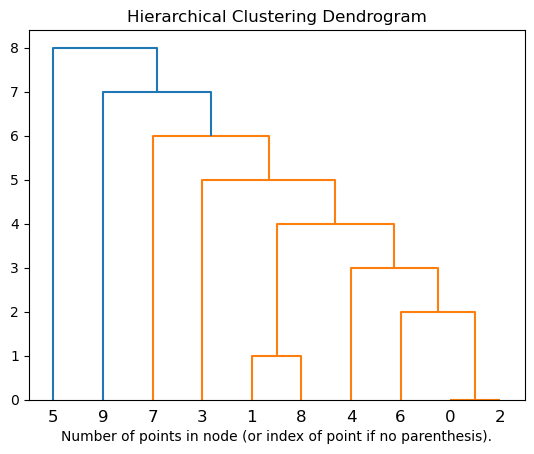

In [6]:
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt
import numpy as np

def plot_dendrogram(model, n_clusters=None, **kwargs):
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Using uniform distances as per your original snippet
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # --- LOGIC TO SHOW 3 CLUSTERS ---
    # If n_clusters is requested, we calculate the cut threshold
    if n_clusters is not None:
        # We look at the merge that reduced n_clusters to (n_clusters - 1)
        # This merge happens at the 2nd to last index for 3 clusters, etc.
        # We set the threshold slightly below that distance.
        if linkage_matrix.shape[0] >= n_clusters:
            # The merge index we want to be "above" the cut
            last_merge_index = -(n_clusters - 1) 
            cut_height = linkage_matrix[last_merge_index, 2]
            
            # Set threshold slightly lower than the merge height
            kwargs['color_threshold'] = cut_height - 0.5
        else:
            print(f"Warning: Cannot create {n_clusters} clusters (not enough merges).")

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, n_clusters=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

The code for the plot comes from: 
https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py